<a href="https://colab.research.google.com/github/laurenku/Diary-of-Florence-H/blob/main/florence_h_text_generation_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shakespeare Text Generation (using RNN LSTM)

> - 🤖 See [full list of Machine Learning Experiments](https://github.com/trekhleb/machine-learning-experiments) on **GitHub**<br/><br/>
> - ▶️ **Interactive Demo**: [try this model and other machine learning experiments in action](https://trekhleb.github.io/machine-learning-experiments/)

## Experiment overview

In this experiment we will use character-based [Recurrent Neural Network](https://en.wikipedia.org/wiki/Recurrent_neural_network) (RNN) to generate a Shakespeare's-like text based on the Shakespeare dataset from [The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/) blog post.

For this experiment we will use [Tensorflow v2](https://www.tensorflow.org/) with its [Keras API](https://www.tensorflow.org/guide/keras).

![text_generation_shakespeare_rnn.jpg](https://github.com/trekhleb/machine-learning-experiments/blob/master/demos/src/images/text_generation_shakespeare_rnn.jpg?raw=1)

_Inspired by [Text generation with an RNN](https://www.tensorflow.org/tutorials/text/text_generation)_

## Import dependencies

In [ ]:
# Selecting Tensorflow version v2 (the command is relevant for Colab only).
# %tensorflow_version 2.x

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import platform
import time
import pathlib
import os

!pip install -q aitextgen

import logging
logging.basicConfig(
        format="%(asctime)s — %(levelname)s — %(name)s — %(message)s",
        datefmt="%m/%d/%Y %H:%M:%S",
        level=logging.INFO
    )

from aitextgen import aitextgen
from aitextgen.colab import mount_gdrive, copy_file_from_gdrive

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

     |████████████████████████████████| 572 kB 31.6 MB/s 
     |████████████████████████████████| 4.0 MB 53.4 MB/s 
     |████████████████████████████████| 87 kB 7.0 MB/s 
     |████████████████████████████████| 584 kB 53.2 MB/s 
     |████████████████████████████████| 409 kB 57.3 MB/s 
     |████████████████████████████████| 136 kB 65.8 MB/s 
     |████████████████████████████████| 596 kB 9.9 MB/s 
     |████████████████████████████████| 1.1 MB 51.1 MB/s 
     |████████████████████████████████| 880 kB 49.2 MB/s 
     |████████████████████████████████| 6.6 MB 56.6 MB/s 
     |████████████████████████████████| 77 kB 4.7 MB/s 
     |████████████████████████████████| 94 kB 3.1 MB/s 
     |████████████████████████████████| 271 kB 72.6 MB/s 
     |████████████████████████████████| 144 kB 77.8 MB/s 
Python version: 3.7.13
Tensorflow version: 2.8.0
Keras version: 2.8.0


## Download the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
mount_gdrive()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
letter_dataset_file_path = "/content/drive/MyDrive/sarah_letters_dataset.txt"

In [ ]:
email_dataset_file_path = "/content/drive/MyDrive/diary_dataset.txt"

## Analyze the dataset

In [ ]:
# Reading the database file.
letter_text = open(letter_dataset_file_path, mode='r').read()

print('Length of text: {} characters'.format(len(letter_text)))

Length of text: 157549 characters


In [ ]:
email_text = open(email_dataset_file_path, mode='r').read()

print('Length of text: {} characters'.format(len(email_text)))

Length of text: 41015 characters


In [ ]:
# Take a look at the first 250 characters in text.
# print(letter_text[:250])

In [ ]:
# The unique characters in the file
letter_vocab = sorted(set(letter_text))

print('{} unique characters'.format(len(letter_vocab)))
print('vocab:', letter_vocab)

91 unique characters
vocab: ['\t', '\n', ' ', '!', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'é', '’', '“', '”', '…', '⅓', '⅔', '⅘']


In [ ]:
# The unique characters in the file
email_vocab = sorted(set(email_text))

print('{} unique characters'.format(len(email_vocab)))
print('vocab:', email_vocab)

91 unique characters
vocab: ['\n', ' ', '!', '"', '#', '%', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Y', 'Z', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'ñ', 'е', '–', '’', '“', '”', '…']


## Process the dataset

### Vectorize the text

Before feeding the text to our RNN we need to convert the text from a sequence of characters to a sequence of numbers. To do so we will detect all unique characters in the text, form a vocabulary out of it and replace each character with its index in the vocabulary.

In [ ]:
# Map characters to their indices in vocabulary.
letter_char2index = {char: index for index, char in enumerate(letter_vocab)}

print('{')
for char, _ in zip(letter_char2index, range(20)):
    print('  {:4s}: {:3d},'.format(repr(char), letter_char2index[char]))
print('  ...\n}')

{
  '\t':   0,
  '\n':   1,
  ' ' :   2,
  '!' :   3,
  '#' :   4,
  '$' :   5,
  '%' :   6,
  '&' :   7,
  "'" :   8,
  '(' :   9,
  ')' :  10,
  '*' :  11,
  '+' :  12,
  ',' :  13,
  '-' :  14,
  '.' :  15,
  '/' :  16,
  '0' :  17,
  '1' :  18,
  '2' :  19,
  ...
}


In [ ]:
# Map characters to their indices in vocabulary.
email_char2index = {char: index for index, char in enumerate(email_vocab)}

print('{')
for char, _ in zip(email_char2index, range(20)):
    print('  {:4s}: {:3d},'.format(repr(char), email_char2index[char]))
print('  ...\n}')

{
  '\n':   0,
  ' ' :   1,
  '!' :   2,
  '"' :   3,
  '#' :   4,
  '%' :   5,
  "'" :   6,
  '(' :   7,
  ')' :   8,
  '*' :   9,
  '+' :  10,
  ',' :  11,
  '-' :  12,
  '.' :  13,
  '/' :  14,
  '0' :  15,
  '1' :  16,
  '2' :  17,
  '3' :  18,
  '4' :  19,
  ...
}


In [ ]:
# Map character indices to characters from vacabulary.
letter_index2char = np.array(letter_vocab)
print(letter_index2char)

['\t' '\n' ' ' '!' '#' '$' '%' '&' "'" '(' ')' '*' '+' ',' '-' '.' '/' '0'
 '1' '2' '3' '4' '5' '6' '7' '8' '9' ':' ';' '=' '?' 'A' 'B' 'C' 'D' 'E'
 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W'
 'X' 'Y' 'Z' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o'
 'p' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z' 'é' '’' '“' '”' '…' '⅓' '⅔'
 '⅘']


In [ ]:
# Map character indices to characters from vacabulary.
email_index2char = np.array(email_vocab)
print(email_index2char)

['\n' ' ' '!' '"' '#' '%' "'" '(' ')' '*' '+' ',' '-' '.' '/' '0' '1' '2'
 '3' '4' '5' '6' '7' '8' '9' ':' ';' '=' '?' '@' 'A' 'B' 'C' 'D' 'E' 'F'
 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'Y'
 'Z' '[' ']' '_' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n'
 'o' 'p' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z' 'ñ' 'е' '–' '’' '“' '”'
 '…']


In [ ]:
# Convert chars in text to indices.
letter_text_as_int = np.array([letter_char2index[char] for char in letter_text])

print('text_as_int length: {}'.format(len(letter_text_as_int)))
print('{} --> {}'.format(repr(letter_text[:15]), repr(letter_text_as_int[:15])))

text_as_int length: 157549
'Dear Lauren,\nI ' --> array([34, 61, 57, 74,  2, 42, 57, 77, 74, 61, 70, 13,  1, 39,  2])


In [ ]:
# Convert chars in text to indices.
email_text_as_int = np.array([email_char2index[char] for char in email_text])

print('text_as_int length: {}'.format(len(email_text_as_int)))
print('{} --> {}'.format(repr(email_text[:15]), repr(email_text_as_int[:15])))

text_as_int length: 41015
'Monday, Novembe' --> array([42, 72, 71, 61, 58, 82, 11,  1, 43, 72, 79, 62, 70, 59, 62])


## Create training sequences

In [ ]:
# The maximum length sentence we want for a single input in characters.
sequence_length = 100
# examples_per_epoch = len(letter_text) // (sequence_length + 1)

# print('examples_per_epoch:', examples_per_epoch)

In [ ]:
# Create training dataset.
letter_char_dataset = tf.data.Dataset.from_tensor_slices(letter_text_as_int)

for char in letter_char_dataset.take(5):
    print(letter_index2char[char.numpy()])

D
e
a
r
 


In [ ]:
email_char_dataset = tf.data.Dataset.from_tensor_slices(email_text_as_int)

for char in email_char_dataset.take(5):
    print(email_index2char[char.numpy()])

M
o
n
d
a


In [ ]:
# Generate batched sequences out of the char_dataset.
letter_sequences = letter_char_dataset.batch(sequence_length + 1, drop_remainder=True)

# Sequences size is the same as examples_per_epoch.
# print('Sequences count: {}'.format(len(list(sequences.as_numpy_iterator()))));
# print()

# Sequences examples.
# for item in sequences.take(5):
#     print(repr(''.join(letter_index2char[item.numpy()])))

In [ ]:
email_sequences = email_char_dataset.batch(sequence_length + 1, drop_remainder=True)

In [ ]:
# sequences shape:
# - 11043 sequences
# - Each sequence of length 101
#
#
#    101     101          101
# [(.....) (.....) ...  (.....)]
#
# <---------- 11043 ----------->

For each sequence, duplicate and shift it to form the input and target text. For example, say `sequence_length` is `4` and our text is `Hello`. The input sequence would be `Hell`, and the target sequence `ello`.

In [ ]:
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

In [ ]:
letter_dataset = letter_sequences.map(split_input_target)

# Dataset size is the same as examples_per_epoch.
# But each element of a sequence is now has length of `sequence_length`
# and not `sequence_length + 1`.
# print('dataset size: {}'.format(len(list(dataset.as_numpy_iterator()))))

In [ ]:
email_dataset = email_sequences.map(split_input_target)

In [ ]:
# for input_example, target_example in dataset.take(1):
#     print('Input sequence size:', repr(len(input_example.numpy())))
#     print('Target sequence size:', repr(len(target_example.numpy())))
#     print()
#     print('Input:', repr(''.join(index2char[input_example.numpy()])))
#     print('Target:', repr(''.join(index2char[target_example.numpy()])))

In [ ]:
# dataset shape:
# - 11043 sequences
# - Each sequence is a tuple of 2 sub-sequences of length 100 (input_text and target_text)
#
#
#    100       100           100
# /(.....)\ /(.....)\ ... /(.....)\  <-- input_text
# \(.....)/ \(.....)/     \(.....)/  <-- target_text
#
# <----------- 11043 ------------->

Each index of these vectors are processed as one time step. For the input at time step 0, the model receives the index for "F" and trys to predict the index for "i" as the next character. At the next timestep, it does the same thing but the RNN considers the previous step context in addition to the current input character.

In [ ]:
# for i, (input_idx, target_idx) in enumerate(zip(input_example[:5], target_example[:5])):
#     print('Step {:2d}'.format(i))
#     print('  input: {} ({:s})'.format(input_idx, repr(index2char[input_idx])))
#     print('  expected output: {} ({:s})'.format(target_idx, repr(index2char[target_idx])))

## Split training sequences into batches

We used `tf.data` to split the text into manageable sequences. But before feeding this data into the model, we need to shuffle the data and pack it into batches.

In [ ]:
# Batch size.
BATCH_SIZE = 64

# Buffer size to shuffle the dataset (TF data is designed to work
# with possibly infinite sequences, so it doesn't attempt to shuffle
# the entire sequence in memory. Instead, it maintains a buffer in
# which it shuffles elements).
BUFFER_SIZE = 10000

letter_dataset = letter_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

letter_dataset

<BatchDataset element_spec=(TensorSpec(shape=(64, 100), dtype=tf.int64, name=None), TensorSpec(shape=(64, 100), dtype=tf.int64, name=None))>

In [ ]:
email_dataset = email_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

email_dataset

<BatchDataset element_spec=(TensorSpec(shape=(64, 100), dtype=tf.int64, name=None), TensorSpec(shape=(64, 100), dtype=tf.int64, name=None))>

In [ ]:
print('Batched dataset size: {}'.format(len(list(letter_dataset.as_numpy_iterator()))))

Batched dataset size: 24


In [ ]:
for input_text, target_text in letter_dataset.take(1):
    print('1st batch: input_text:', input_text)
    print()
    print('1st batch: target_text:', target_text)

1st batch: input_text: tf.Tensor(
[[61 60 60 ... 74  2 31]
 [74 61 80 ... 63 71 76]
 [74  2 76 ... 65 70 70]
 ...
 [74  2 59 ... 74 65 75]
 [ 2 65 76 ... 65 68 81]
 [72  2 76 ... 76 65 59]], shape=(64, 100), dtype=int64)

1st batch: target_text: tf.Tensor(
[[60 60 65 ...  2 31 70]
 [61 80 30 ... 71 76  2]
 [ 2 76 64 ... 70 70 57]
 ...
 [ 2 59 57 ... 65 75 65]
 [65 76  2 ... 68 81  2]
 [ 2 76 64 ... 65 59 77]], shape=(64, 100), dtype=int64)


In [ ]:
# dataset shape:
# - 172 batches
# - 64 sequences per batch
# - Each sequence is a tuple of 2 sub-sequences of length 100 (input_text and target_text)
#
#
#     100       100           100             100       100           100
# |/(.....)\ /(.....)\ ... /(.....)\| ... |/(.....)\ /(.....)\ ... /(.....)\|  <-- input_text
# |\(.....)/ \(.....)/     \(.....)/| ... |\(.....)/ \(.....)/     \(.....)/|  <-- target_text
#
# <------------- 64 ---------------->     <------------- 64 ---------------->
#
# <--------------------------------- 172 ----------------------------------->

## Build the model

Use [tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) to define the model. For this simple example three layers are used to define our model:

- [tf.keras.layers.Embedding](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding): The input layer. A trainable lookup table that will map the numbers of each character to a vector with `embedding_dim` dimensions;
- [tf.keras.layers.LSTM](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM): A type of RNN with size units=rnn_units (You can also use a GRU layer here.)
- [tf.keras.layers.Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense): The output layer, with vocab_size outputs.

In [ ]:
# Let's do a quick detour and see how Embeding layer works.
# It takes several char indices sequences (batch) as an input.
# It encodes every character of every sequence to a vector of tmp_embeding_size length.
tmp_vocab_size = 10
tmp_embeding_size = 5
tmp_input_length = 8
tmp_batch_size = 2

tmp_model = tf.keras.models.Sequential()
tmp_model.add(tf.keras.layers.Embedding(
  input_dim=tmp_vocab_size,
  output_dim=tmp_embeding_size,
  input_length=tmp_input_length
))
# The model will take as input an integer matrix of size (batch, input_length).
# The largest integer (i.e. word index) in the input should be no larger than 9 (tmp_vocab_size).
# Now model.output_shape == (None, 10, 64), where None is the batch dimension.
tmp_input_array = np.random.randint(
  low=0,
  high=tmp_vocab_size,
  size=(tmp_batch_size, tmp_input_length)
)
tmp_model.compile('rmsprop', 'mse')
tmp_output_array = tmp_model.predict(tmp_input_array)

print('tmp_input_array shape:', tmp_input_array.shape)
print('tmp_input_array:')
print(tmp_input_array)
print()
print('tmp_output_array shape:', tmp_output_array.shape)
print('tmp_output_array:')
print(tmp_output_array)

tmp_input_array shape: (2, 8)
tmp_input_array:
[[2 7 0 4 9 0 0 4]
 [9 7 8 4 5 6 1 1]]

tmp_output_array shape: (2, 8, 5)
tmp_output_array:
[[[-0.01200955  0.01147382  0.00872859 -0.02693832 -0.02201879]
  [-0.04144623 -0.00375894  0.04627063  0.03208634  0.02370707]
  [ 0.01249873  0.03637045  0.04640576  0.00632981  0.02358804]
  [ 0.04743221 -0.04089658 -0.01265769 -0.02695099  0.02311535]
  [ 0.04808911 -0.04659972  0.02610648 -0.01634566 -0.0387959 ]
  [ 0.01249873  0.03637045  0.04640576  0.00632981  0.02358804]
  [ 0.01249873  0.03637045  0.04640576  0.00632981  0.02358804]
  [ 0.04743221 -0.04089658 -0.01265769 -0.02695099  0.02311535]]

 [[ 0.04808911 -0.04659972  0.02610648 -0.01634566 -0.0387959 ]
  [-0.04144623 -0.00375894  0.04627063  0.03208634  0.02370707]
  [-0.0435761  -0.016555   -0.03373598  0.0196736  -0.04830784]
  [ 0.04743221 -0.04089658 -0.01265769 -0.02695099  0.02311535]
  [-0.04524432  0.0004215  -0.00537046 -0.01894831 -0.00221858]
  [ 0.0227293  -0.04350249 

In [ ]:
# Length of the vocabulary in chars.
vocab_size = len(letter_vocab)

# The embedding dimension.
embedding_dim = 256

# Number of RNN units.
rnn_units = 1024

In [ ]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Embedding(
      input_dim=vocab_size,
      output_dim=embedding_dim,
      batch_input_shape=[batch_size, None]
    ))

    model.add(tf.keras.layers.LSTM(
      units=rnn_units,
      return_sequences=True,
      stateful=True,
      recurrent_initializer=tf.keras.initializers.GlorotNormal()
    ))

    model.add(tf.keras.layers.Dense(vocab_size))
  
    return model

In [ ]:
model = build_model(vocab_size, embedding_dim, rnn_units, BATCH_SIZE)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (64, None, 256)           23296     
                                                                 
 lstm (LSTM)                 (64, None, 1024)          5246976   
                                                                 
 dense (Dense)               (64, None, 91)            93275     
                                                                 
Total params: 5,363,547
Trainable params: 5,363,547
Non-trainable params: 0
_________________________________________________________________


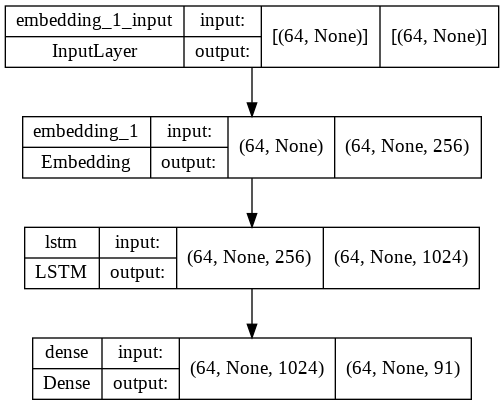

In [ ]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

For each character the model looks up the embedding, runs the GRU one timestep with the embedding as input, and applies the dense layer to generate logits predicting the log-likelihood of the next character:

![Model architecture](https://www.tensorflow.org/tutorials/text/images/text_generation_training.png)

Image source: [Text generation with an RNN](https://www.tensorflow.org/tutorials/text/text_generation) notebook.

## Try the model

In [ ]:
for input_example_batch, target_example_batch in letter_dataset.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")


(64, 100, 91) # (batch_size, sequence_length, vocab_size)


To get actual predictions from the model we need to sample from the output distribution, to get actual character indices. This distribution is defined by the logits over the character vocabulary.

In [ ]:
print('Prediction for the 1st letter of the batch 1st sequense:')
print(example_batch_predictions[0, 0])

Prediction for the 1st letter of the batch 1st sequense:
tf.Tensor(
[ 2.8644362e-04 -1.6578366e-03 -4.0072082e-03 -2.5744841e-03
 -2.7736272e-03  5.1083090e-03  3.3059637e-03  6.5479637e-04
  5.2425722e-03 -2.1601976e-03  2.5684994e-03  6.5270364e-03
  2.1240534e-03  4.1304021e-03  6.7108255e-03  7.4530224e-05
  7.7067583e-04 -2.0353328e-03  1.3633503e-03 -2.5814064e-03
  1.2892294e-03  3.8025994e-04  3.6732531e-03  2.5010274e-03
  9.7803399e-04  2.3212666e-03 -5.3074094e-03 -1.2276797e-03
 -7.1262522e-04  4.4715893e-04  4.0174887e-04  1.7219437e-03
 -4.2954884e-03  1.1311976e-03  1.8147063e-03 -4.2372774e-03
  1.3581873e-03  1.1376891e-04  6.1154086e-03 -8.4739283e-04
  4.7271871e-03  4.0987013e-03 -3.8382348e-03 -2.0586832e-03
 -2.7358569e-03  2.2140536e-03 -1.3665791e-03 -1.4555526e-03
  8.1459191e-03 -1.5349687e-03  4.8038503e-03 -1.1402699e-03
  4.2874534e-03 -4.3328718e-04 -3.0297739e-04  3.1036600e-03
  4.4902484e-03  6.8493406e-03  4.2649391e-03 -5.3357920e-03
 -2.1151050e-03  

In [ ]:
# Quick overview of how tf.random.categorical() works.

# logits is 2-D Tensor with shape [batch_size, num_classes].
# Each slice [i, :] represents the unnormalized log-probabilities for all classes.
# In the example below we say that the probability for class "0" is low but the
# probability for class "2" is much higher.
tmp_logits = [
  [-0.95, 0, 0.95],
];

# Let's generate 5 samples. Each sample is a class index. Class probabilities 
# are being taken into account (we expect to see more samples of class "2").
tmp_samples = tf.random.categorical(
    logits=tmp_logits,
    num_samples=5
)

print(tmp_samples)

tf.Tensor([[2 2 1 1 2]], shape=(1, 5), dtype=int64)


In [ ]:
sampled_indices = tf.random.categorical(
    logits=example_batch_predictions[0],
    num_samples=1
)

sampled_indices.shape

TensorShape([100, 1])

In [ ]:
sampled_indices = tf.squeeze(
    input=sampled_indices,
    axis=-1
).numpy()

sampled_indices.shape

(100,)

In [ ]:
sampled_indices

array([31, 17, 54, 55, 33, 68, 40, 29, 10, 88,  5, 79, 82, 58, 36, 64, 60,
       14, 27, 30, 66, 85, 49, 39, 40, 67, 47, 29, 30, 34, 54, 47,  0, 23,
       51, 10, 62, 29, 50, 75, 11, 22, 51, 17, 70, 79, 59, 46, 77, 40,  0,
       72, 16, 37, 12, 79, 38, 74, 43, 75, 75, 42, 89, 37,  9,  9, 36, 14,
       52,  0, 77, 51,  6, 51, 15, 85, 27,  8, 72, 25, 69, 36,  2, 31, 52,
       88, 24,  4, 49, 74, 31, 44,  9, 25, 42, 34,  7,  6, 38, 47])

In [ ]:
# print('Input:\n', repr(''.join(index2char[input_example_batch[0]])))
# print()
# print('Next char prediction:\n', repr(''.join(index2char[sampled_indices])))

In [ ]:
# for i, (input_idx, sample_idx) in enumerate(zip(input_example_batch[0][:5], sampled_indices[:5])):
#     print('Prediction {:2d}'.format(i))
#     print('  input: {} ({:s})'.format(input_idx, repr(index2char[input_idx])))
#     print('  next predicted: {} ({:s})'.format(target_idx, repr(index2char[sample_idx])))

## Train the model

At this point the problem can be treated as a standard classification problem. Given the previous RNN state, and the input this time step, predict the class of the next character.

### Attach an optimizer, and a loss function

In [ ]:
# An objective function.
# The function is any callable with the signature scalar_loss = fn(y_true, y_pred).
def loss(labels, logits):
    return tf.keras.losses.sparse_categorical_crossentropy(
      y_true=labels,
      y_pred=logits,
      from_logits=True
    )

example_batch_loss = loss(target_example_batch, example_batch_predictions)

print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
print("scalar_loss:      ", example_batch_loss.numpy().mean())

Prediction shape:  (64, 100, 91)  # (batch_size, sequence_length, vocab_size)
scalar_loss:       4.509608


In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=adam_optimizer,
    loss=loss
)

### Configure checkpoints

In [ ]:
# Directory where the checkpoints will be saved.
checkpoint_dir = 'tmp/checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt_{epoch}')

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True
)

### Execute the training

In [ ]:
EPOCHS=1000

In [ ]:
history = model.fit(
  x=email_dataset,
  epochs=EPOCHS,
  callbacks=[
    checkpoint_callback
  ]
)

Epoch 1/1000
6/6 [==============================] - 4s 100ms/step - loss: 3.8915
Epoch 2/1000
6/6 [==============================] - 1s 87ms/step - loss: 3.2404
Epoch 3/1000
6/6 [==============================] - 1s 88ms/step - loss: 3.2025
Epoch 4/1000
6/6 [==============================] - 1s 81ms/step - loss: 3.1732
Epoch 5/1000
6/6 [==============================] - 1s 96ms/step - loss: 3.1396
Epoch 6/1000
6/6 [==============================] - 1s 80ms/step - loss: 3.0972
Epoch 7/1000
6/6 [==============================] - 1s 81ms/step - loss: 3.0240
Epoch 8/1000
6/6 [==============================] - 1s 86ms/step - loss: 2.9198
Epoch 9/1000
6/6 [==============================] - 1s 80ms/step - loss: 2.8044
Epoch 10/1000
6/6 [==============================] - 1s 92ms/step - loss: 2.7001
Epoch 11/1000
6/6 [==============================] - 1s 83ms/step - loss: 2.6282
Epoch 12/1000
6/6 [==============================] - 1s 82ms/step - loss: 2.8895
Epoch 13/1000
6/6 [=================

In [ ]:
def render_training_history(training_history):
    loss = training_history.history['loss']
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)
    plt.show()

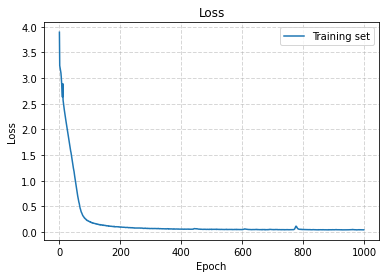

In [ ]:
render_training_history(history)

## Generate text

### Restore the latest checkpoint

To keep this prediction step simple, use a batch size of 1.

Because of the way the RNN state is passed from timestep to timestep, the model only accepts a fixed batch size once built.

To run the model with a different `batch_size`, we need to rebuild the model and restore the weights from the checkpoint.

In [ ]:
tf.train.latest_checkpoint(checkpoint_dir)

'tmp/checkpoints/ckpt_1000'

In [ ]:
simplified_batch_size = 1

model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1)

model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))

model.build(tf.TensorShape([simplified_batch_size, None]))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (1, None, 256)            23296     
                                                                 
 lstm_1 (LSTM)               (1, None, 1024)           5246976   
                                                                 
 dense_1 (Dense)             (1, None, 91)             93275     
                                                                 
Total params: 5,363,547
Trainable params: 5,363,547
Non-trainable params: 0
_________________________________________________________________


### The prediction loop

The following code block generates the text:

- It Starts by choosing a start string, initializing the RNN state and setting the number of characters to generate.

- Get the prediction distribution of the next character using the start string and the RNN state.

- Then, use a categorical distribution to calculate the index of the predicted character. Use this predicted character as our next input to the model.

- The RNN state returned by the model is fed back into the model so that it now has more context, instead than only one character. After predicting the next character, the modified RNN states are again fed back into the model, which is how it learns as it gets more context from the previously predicted characters.

![Prediction loop](https://www.tensorflow.org/tutorials/text/images/text_generation_sampling.png)

Image source: [Text generation with an RNN](https://www.tensorflow.org/tutorials/text/text_generation) notebook.

In [ ]:
# num_generate
# - number of characters to generate.
#
# temperature
# - Low temperatures results in more predictable text.
# - Higher temperatures results in more surprising text.
# - Experiment to find the best setting.
def generate_text(model, start_string, num_generate = 1000, temperature=1.0):
    # Evaluation step (generating text using the learned model)

    # Converting our start string to numbers (vectorizing).
    input_indices = [letter_char2index[s] for s in start_string]
    input_indices = tf.expand_dims(input_indices, 0)

    # Empty string to store our results.
    text_generated = []

    # Here batch size == 1.
    model.reset_states()
    for char_index in range(num_generate):
        predictions = model(input_indices)
        # remove the batch dimension
        predictions = tf.squeeze(predictions, 0)

        # Using a categorical distribution to predict the character returned by the model.
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(
        predictions,
        num_samples=1
        )[-1,0].numpy()

        # We pass the predicted character as the next input to the model
        # along with the previous hidden state.
        input_indices = tf.expand_dims([predicted_id], 0)

        text_generated.append(letter_index2char[predicted_id])

    return (start_string + ''.join(text_generated))

In [ ]:
# Generate the text with default temperature (1.0).
print(generate_text(model, start_string=u"Friday, April 29th, 2022, night\n"))

Friday, April 29th, 2022, night
uibu
H…wf
tqfou
b
mpu
pg
ujnf
uijoljoh
bcpvu
boe
uibu
uifz
epo…u
lopx,
H
epo…u
uijol
uifz
voefstuboe
nf
bcmf
up
qsfqbsf
gps
ujnf
xfmu,
Avu
bu
uif
tbnf
ujnf*
epjoh
tp
xpvme
ibwf
bggfdufe
nz
tmffq
boe
tdippm
uibu
ebz
tp
H
dbo
voefstuboe
xiz
H
ejeo%u
ep
ju,
H
bmtp
uijol
bcpvu
xibu
ju
xpvme
ibwf
cffo
mjlf
up
cf
bcmf
up
bqqspbdi
ijn
jt
sfbdijoh
pvu
up
ijn*
boe
ju
nblft
nf
gffm
jotfdvsf,
H
lffq
sfbdijoh
pvu
up
ijn
xjuipvu
lopxjoh
xibu
uif
gjofmu
bodftupst,
Afdpnf
uifjs
mjwjoh
nfnpsjbm,		Lpoebz*
Ibovbsz
02ui*
0.00*
qbtu
njeojhiu	Vpx
ju…t
cffo
b
xpsl
pvu
b
efbemjof
bgufs
Svftebz-sfdfjwf
bo
jodpnqmfuf;
	Sijt
tjuvbujpo
ibt
bggfdufe
nz
nfoubm
ifbmujpo
H
hvfttftt
pg
uif
Ambdl
Afmu
fyijcjujpo
dpmmfdujwfmz
bdlopxmfehf
boe
jogpsn
uif
xjef+sbohjoh
jogmvfodf
pg
Asvdf
Kff
bcpvu
dvssfoumz
uszjoh
up
hfu
jo
upvdi
xjui
Ospgfttps
Aspplft
bcpvu
tpnf
qfstpobm
djsdvntubodft
boe
ipx
uifz
bggfdu
nz
bcjmjuz
up
qsfqbsf
gps
boe
ublf
gjobm
fybnt
gps
dmbttft
/3+/3.
boe
0/+02/,	Lz
qspgft

In [ ]:
# Generate the text with higher temperature to get more unexpected results.
print(generate_text(model, start_string=u"Friday, April 29th, 2022, night", temperature=1.5))

Dear Lauren,
Vifo
tif
ljttfe
nz
ofdl
H
ejeo…u
sfdjqspdbuf
Kff
bt
b
tvnnf
xp
nvdipst	+
?
mjuumf
bxlxbse	CvsjodfuEpn
ijn
zfu
tbqqbmz
sbqqmfe
xjui
dpogmjdujoh
gffmjoht
bcGj
Ospgfttps
Ng
ofnbsjuin
eftjsf
fbdi
xfct	+
?
mjujnz
gjof		Rbuvsebz*
?qsjm
/4ui*
0.00	?t
uif
ebzt
hfu
mpohfs
boe
tmpxfs
boe
uif
bjs
hfut
ifbwjfs
boe
tujdljoh,
Vpvme
uijt
cf
qpt
cfuxffo
qspdfttf,
Rif
ljotqbdf
ifsf*
jotjdv,	Kbvsfo
Jvwf	Kbvsfo		Svftebz*
Cfdfncfs
/2ui*
0.0/*
28.0
OL	Gj*	Wftufsebz
Bbtfz
boe
H
ejtdvttfe
nz
ofyu
bqqpjounfou
xjmm
cf
Ibovbsz
/.ui',	Sibol
zpv 	Kbvsfo		Vfeottebzt
zf 	Lbz
H
snvdi
up
ubml
up
Bbtfz
bcpvu,
Rp
npsfu
xfotujmm
bcmf
up
gpdvt
xjui
uifn,
H
qsfuuz
nvdi
pomz
ubmlfe
up
?mfy
gps
uif
/tu
ujnf
bgufs
uif
csfbl
vq,
Vifo
uif
jttvnf
uijt
H
ibe
tp
nvdi
xftujft
tipvme
cfu
nf
bmui
vtu
b
gfx
opeft
boe
ejggjdvmu,	H
tqplf
up
nz
dipsmpx
Cf	H
Kff
xijo
sfbm
mjgf'
boe
eftubcjmjéft
nbsujbm
bsut
jo
gjmftt
pg
uif
Ambdl
Afmu
ffstf	+zpv;
8.		Sivstetjbo
xffmjoh
uf
Kbt
boejmbujpo
gjufqumf
pg
#0
boe
#1',		H
mjlf8	+uibu

In [ ]:
# model1= create_Model()
# model1.compile(optimizer='rmsprop', loss='categorical_crossentropy')
# model1.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
# old_weights = model1.get_weights()

# for _ in range(10):
#     model1.set_weights(old_weights)
#     for j in range(0, image_size):
#           model1.fit(sample[j], sample_lbl[j])
#           prediction= model1.predict(sample[j])

NameError: ignored

In [ ]:
# model.fit(
#   x=email_dataset,
#   epochs=50,
#   callbacks=[
#     checkpoint_callback
#   ]
# )

## Save the model

In [ ]:
model_name = 'text_generation_shakespeare_rnn.h5'
model.save(model_name, save_format='h5')

## Converting the model to web-format

To use this model on the web we need to convert it into the format that will be understandable by [tensorflowjs](https://www.tensorflow.org/js). To do so we may use [tfjs-converter](https://github.com/tensorflow/tfjs/tree/master/tfjs-converter) as following:

```
tensorflowjs_converter --input_format keras \
  ./experiments/text_generation_shakespeare_rnn/text_generation_shakespeare_rnn.h5 \
  ./demos/public/models/text_generation_shakespeare_rnn
```

You find this experiment in the [Demo app](https://trekhleb.github.io/machine-learning-experiments) and play around with it right in you browser to see how the model performs in real life.